In [4]:
# Configure Live Reveal Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
_ = cm.update('livereveal', {
        'theme': 'serif',
        'transition': 'fade',
        'start_slideshow_at': 'selected',
        'slideNumber' : 'True',
        'progress' : 'True',
        'width': 1920,
        'height': 1080,
})

# PCA
## [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)

> * "It only works for dense arrays and is not scalable to large dimensional data."
* "It is important to note that this procedure is sensitive to the scaling of the data, and that there is no consensus as to how to best scale the data to obtain optimal results."

### [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine)
Lets take a look at the wine dataset first

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Ash Alcalinity', 'Magnesium', 'Total Phenols', \
           'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', \
           'Dilution', 'Proline']
wine_path = '../data/wine.data'
wine_df = pd.read_csv(wine_path, names=names)
X = wine_df.drop('Class',axis=1)
y = wine_df['Class']

Its got 3 classes, 13 features

In [7]:
wine_df.head()

,Class,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Lets take a look at the data before we standardize it

In [8]:
X.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Standardizing
Whether you should standardize the data prior to a PCA depends on the measurement scales of the original features. PCA yields a feature subspace that maximizes the variance along found axes, so it makes sense to standardize the data, especially, if it was measured on different scales. This will transform the data onto unit scale (mean=0 and variance=1), which is a common requirement for the optimal performance of many machine learning algorithms.

Now its standardized! Notice the zero mean and unit std

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=names[1:])
X_std.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [10]:
# source: http://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix
def factor_scatter_matrix(df, factor, palette=None, figsize=(10,10), labelpad=50, ax=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde
    from textwrap import wrap

    if isinstance(factor, str):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=figsize,marker='o',c=colors,diagonal=None, ax=ax)

    for rc in range(len(df.columns)):
        for group in classes:
            y = df[factor == group].iloc[:,rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])
    
    # Hide tickmarks/ticklabels, and rotate labels
    for i, axs in enumerate(axarr):
        for j, ax in enumerate(axs):
            ax.xaxis.set_ticklabels([])
            ax.yaxis.set_ticklabels([])
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_ticks_position('none')
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = labelpad
            ax.xaxis.label.set_text('\n'.join(ax.xaxis.label.get_text().split(' ')))
            ax.yaxis.label.set_text('\n'.join(ax.yaxis.label.get_text().split(' ')))

    return axarr

## Visualization
Now lets take a look at the feature space

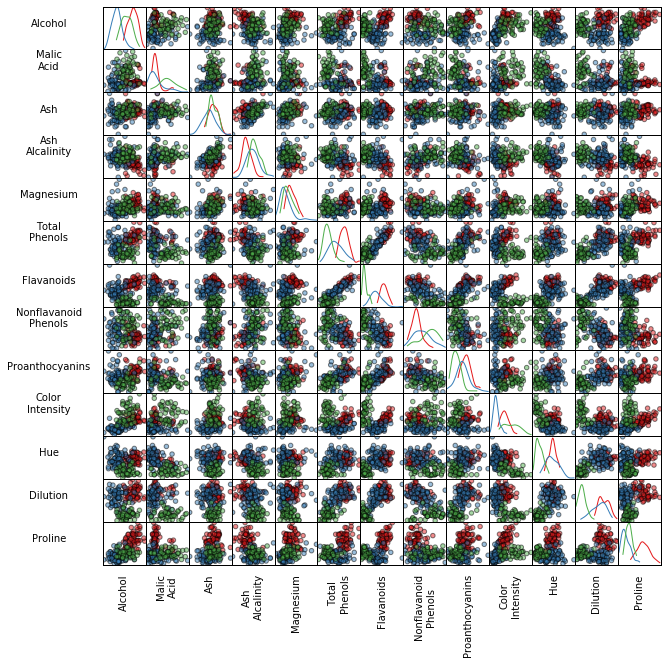

In [11]:
wine_df_std = X_std
wine_df_std['Class'] = y
axarr = factor_scatter_matrix(wine_df_std,'Class')

Let use a different plotting approach to look at it up close

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Picking from some of the more distinctive features, lets look how PCA sees it

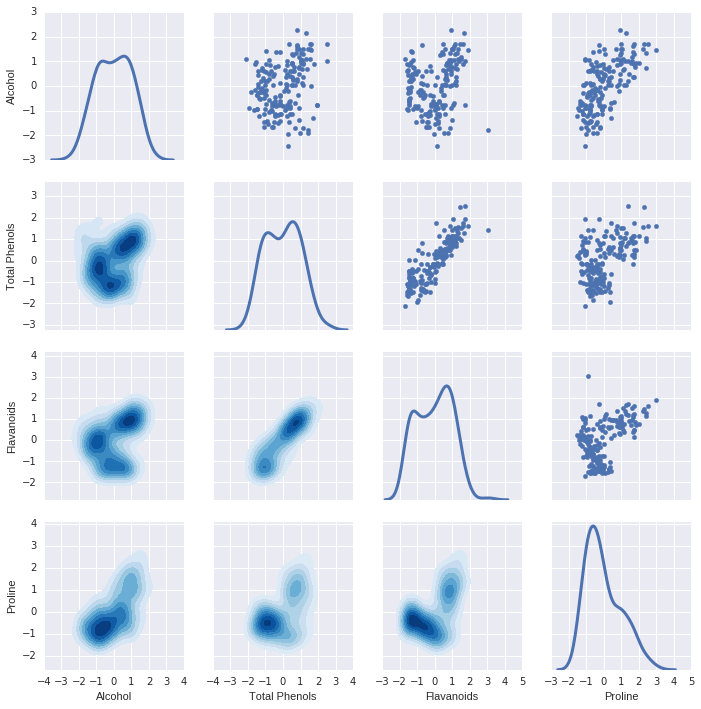

In [13]:
wine_df2_std = wine_df_std[['Class', 'Alcohol', 'Total Phenols', 'Flavanoids', 'Proline']]
g = sns.PairGrid(wine_df2_std.drop('Class', axis=1))
ax = g.map_upper(plt.scatter)
ax = g.map_lower(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
ax = g.map_diag(sns.kdeplot, lw=3, legend=False)

Oh, that right. PCA doesn't care about class labels... But we do.

Ok, let see it close up with some labeled hues now

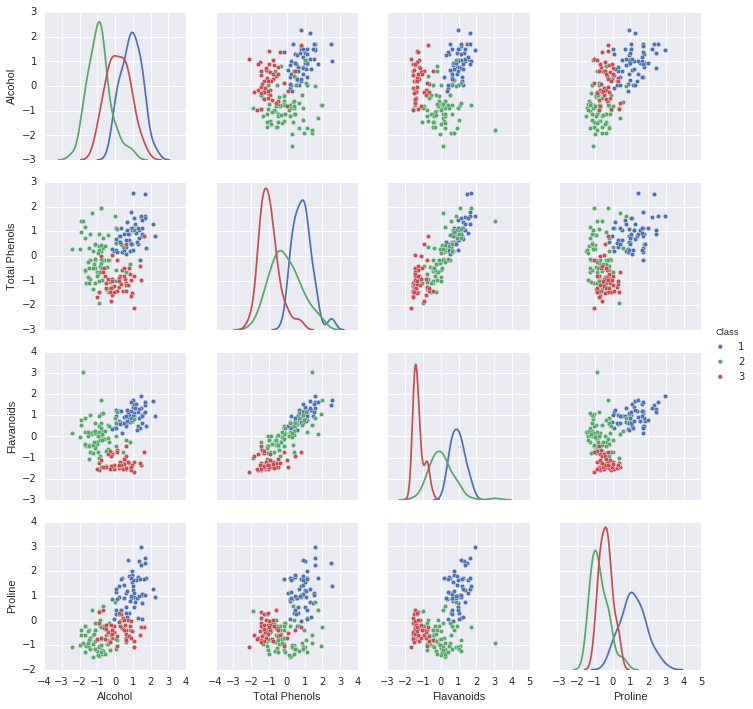

In [14]:
vars = wine_df2_std.drop('Class', 1).columns
g = sns.pairplot(wine_df2_std, hue="Class", diag_kind="kde", vars=vars)

Lets try and add back the kdeplots on the lower half

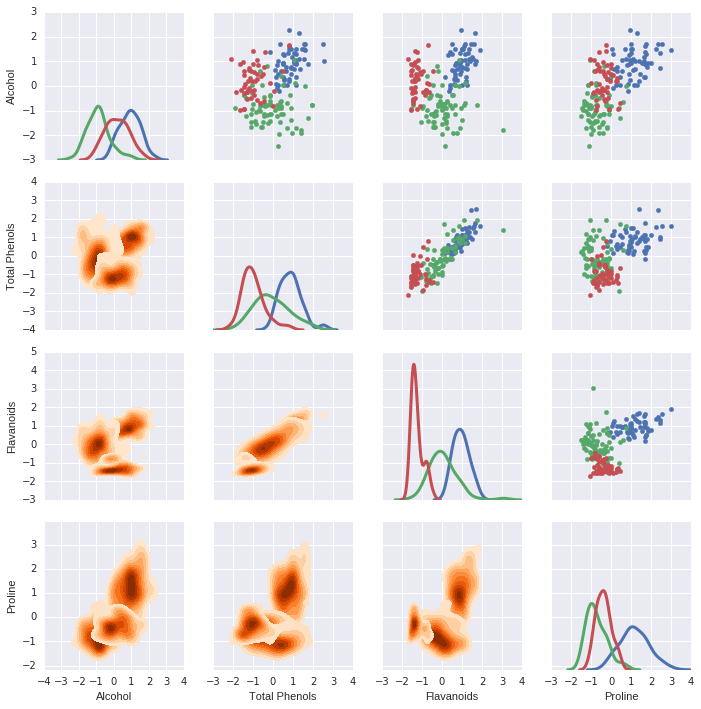

In [15]:
g = sns.PairGrid(wine_df2_std, hue="Class", vars=vars)
g.map_lower(sns.kdeplot, cmap="Oranges", shade=True, shade_lowest=False)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

Hmm... can't fix the cmap for each class hue, oh well.

## PCA Time
Lets get to fitting a PCA model to the data

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_std)
X_std_pca = pca.transform(X_std)
print('X_std_pca.shape:', X_std_pca.shape)
print('pca.components_:', pca.components_.shape)

('X_std_pca.shape:', (178, 13))
('pca.components_:', (13, 14))


Now lets look at the new projected data

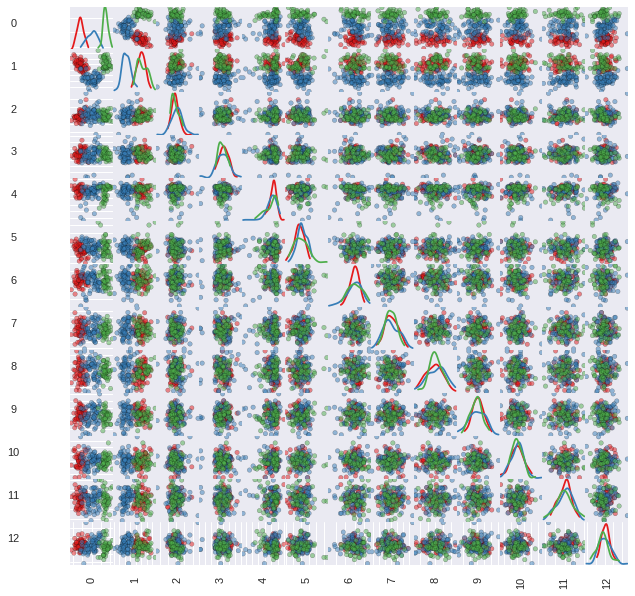

In [17]:
wine_df3_pca = pd.DataFrame(X_std_pca)
wine_df3_pca['Class'] = wine_df['Class']
axarr = factor_scatter_matrix(wine_df3_pca,'Class')

Lets focus on the first few dimensions with the largest eigenvectors

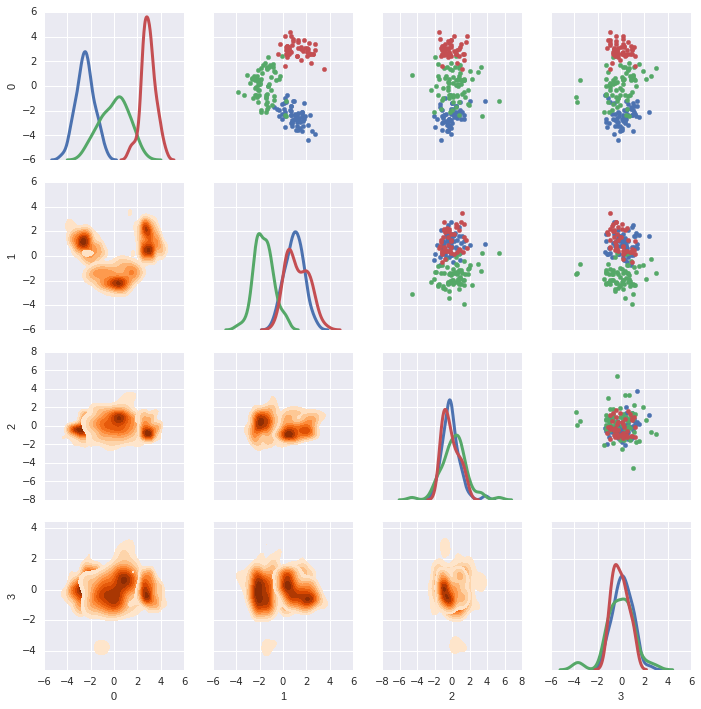

In [18]:
wine_df4_pca = wine_df3_pca[['Class', 0, 1, 2, 3]]

vars = wine_df4_pca.drop('Class', 1).columns
g = sns.PairGrid(wine_df4_pca, hue="Class", vars=vars)
g.map_lower(sns.kdeplot, cmap="Oranges", shade=True, shade_lowest=False)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

Looks like $0$ and $1$ are useful, but the rest are just about useless

# LDA
## [Linear Discriminant Analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)

In [19]:
warnings.filterwarnings('default')

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_std_lda = lda.fit_transform(X_std, y)

/home/steve/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Shoot, look like we got a [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) issue. Some of our columns in our covariance matrix are almost linear combinations of each other, thus some determinate we use to calculate the inverse are really close to zero, i.e. singular. [[stackexchange]](http://stats.stackexchange.com/questions/29385/collinear-variables-in-multiclass-lda-training)

Remember a lot of the distributions in the first plot along the diagonal where almost on top of each other. Lets use the un-standardized data and see if non-normalized feature units can make this go away.

Alright, looks like we got it fit without any warnings

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_std_lda = lda.fit_transform(X, y)
print('X_std_lda.shape:', X_std_lda.shape)
print('lda.coef_:', lda.coef_.shape)

('X_std_lda.shape:', (178, 2))
('lda.coef_:', (3, 13))


In [22]:
warnings.filterwarnings('ignore')

Now lets project the data into our new subspace with **LDA**

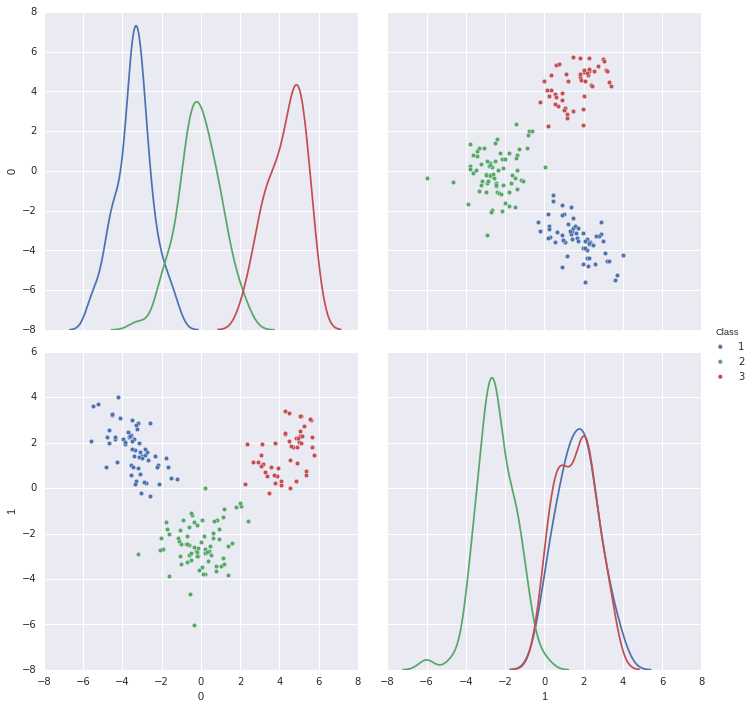

In [23]:
wine_df_lda = pd.DataFrame(X_std_lda)
wine_df_lda['Class'] = wine_df['Class']
vars = wine_df_lda.drop('Class', 1).columns
g = sns.pairplot(wine_df_lda, hue="Class", diag_kind="kde", vars=vars, size=5)

Lets compare that data with the subspace from **PCA**

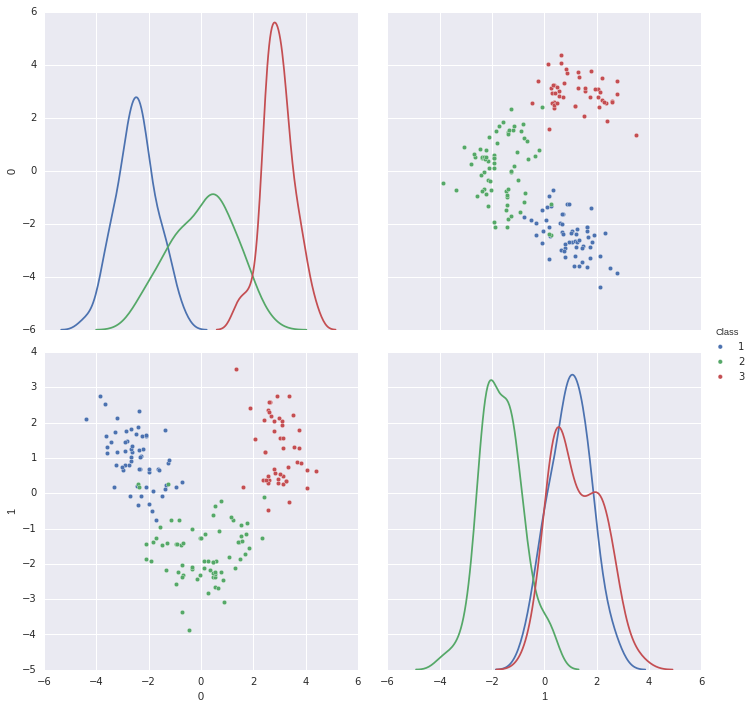

In [24]:
wine_df4_pca = wine_df3_pca[[0, 1, 'Class']]
vars = wine_df4_pca.drop('Class', 1).columns

g = sns.pairplot(wine_df4_pca, hue="Class", diag_kind="kde", vars=vars, size=5)

## MNIST Dataset
Now lets turn our attention to the MNIST data

In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

mnist_train_path = '../data/MNIST_HW1/train.csv'
mnist_test_path = '../data/MNIST_HW1/test.csv'

mnist_train_df = pd.read_csv(mnist_train_path, header=None).T
mnist_test_df = pd.read_csv(mnist_test_path, header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

Now lets make the the 0 vs. 1 and 3 vs. 5 split for our test and training data

In [27]:
index_0s = mnist_train_df['Class'] == 0
index_1s = mnist_train_df['Class'] == 1
index_3s = mnist_train_df['Class'] == 3
index_5s = mnist_train_df['Class'] == 5

mnist_train_0_1_df = mnist_train_df.loc[index_0s | index_1s]
mnist_train_3_5_df = mnist_train_df.loc[index_3s | index_5s]

In [28]:
index_0s = mnist_test_df['Class'] == 0
index_1s = mnist_test_df['Class'] == 1
index_3s = mnist_test_df['Class'] == 3
index_5s = mnist_test_df['Class'] == 5

mnist_test_0_1_df = mnist_test_df.loc[index_0s | index_1s]
mnist_test_3_5_df = mnist_test_df.loc[index_3s | index_5s]

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

X_0_1 = mnist_train_0_1_df.drop('Class',axis=1)
X_3_5 = mnist_train_3_5_df.drop('Class',axis=1)

y_0_1 = mnist_train_0_1_df['Class']
y_3_5 = mnist_train_3_5_df['Class']

Lest take a look at some of the digits

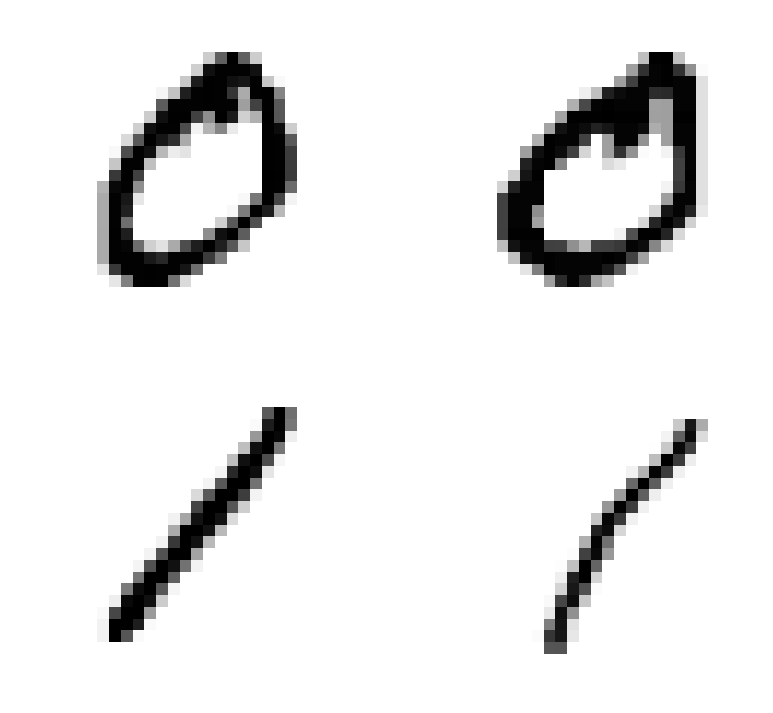

In [30]:
plt.figure(figsize=(12,10))
numbers = [0,1,12663,12664]
for i in range(4):
    example = X_0_1.ix[numbers[i]].reshape(28, 28).T
    plt.subplot(2, 2, i+1)
    plt.imshow(example, cmap='gray_r', interpolation='nearest')
    plt.axis("off")
plt.tight_layout()

Now lets fit a PCA model to the 0 vs. 1 training set

In [31]:
from sklearn.decomposition import PCA

pca_0_1 = PCA(n_components=X_0_1.shape[1])
X_0_1_pca = pca_0_1.fit_transform(X_0_1)
print('X_std_pca.shape:', X_0_1_pca.shape)
print('pca.components_:', pca_0_1.components_.shape)

('X_std_pca.shape:', (12665, 784))
('pca.components_:', (784, 784))


In [32]:
mnist_train_0_1_df_pca = pd.DataFrame(X_0_1_pca)
mnist_train_0_1_df_pca['Class'] = mnist_train_0_1_df['Class']
X_0_1_pca = mnist_train_0_1_df_pca.drop('Class',axis=1)

Take a look at the first dominate eigenvector. Notice the contrast between area the 0 and 1 normally occupy. (Reminds me of a red blood cell under an scanning electron microscope)

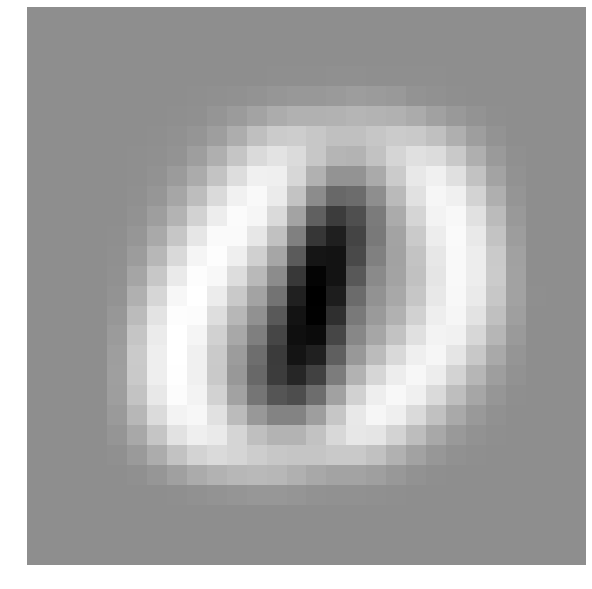

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(pca_0_1.components_[0].reshape((28, 28)).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

In fact, lets take look as some more

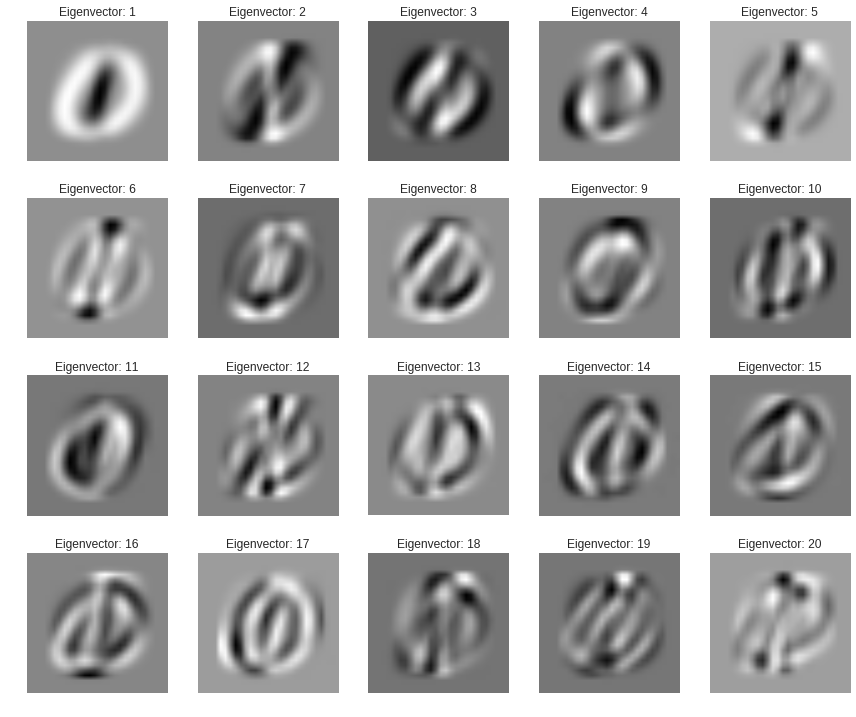

In [34]:
plt.figure(figsize=(12,10))
for i in range(20):
    example = pca_0_1.components_[i].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()

Lets do the same for the 3 vs 5 case

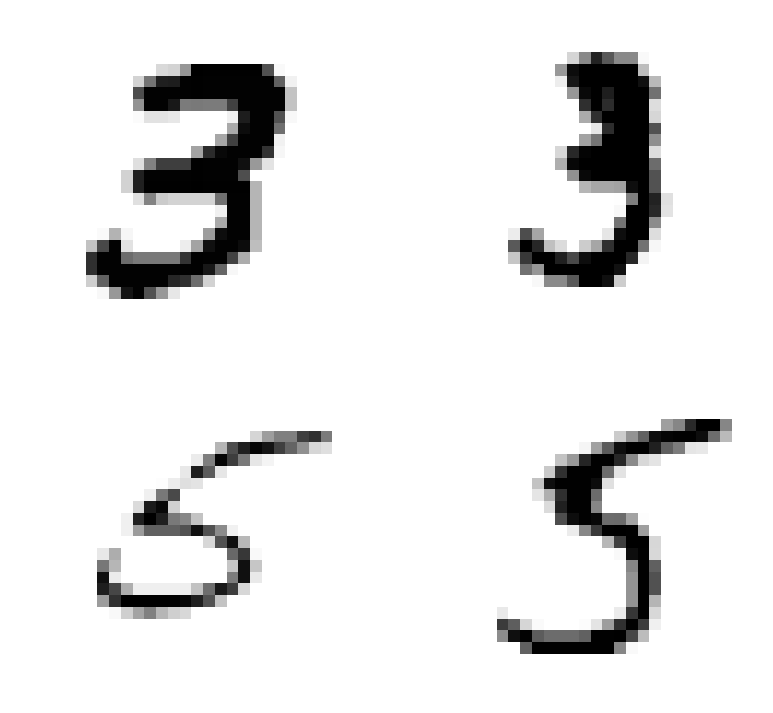

In [35]:
plt.figure(figsize=(12,10))
numbers = [12665,12666,24215,24216]
for i in range(4):
    example = X_3_5.ix[numbers[i]].reshape(28, 28).T
    plt.subplot(2, 2, i+1)
    plt.imshow(example, cmap='gray_r', interpolation='nearest')
    plt.axis("off")
plt.tight_layout()

In [36]:
pca_3_5 = PCA(n_components=X_3_5.shape[1])
X_3_5_pca = pca_3_5.fit_transform(X_3_5)

Agian, the first dominate eigenvector

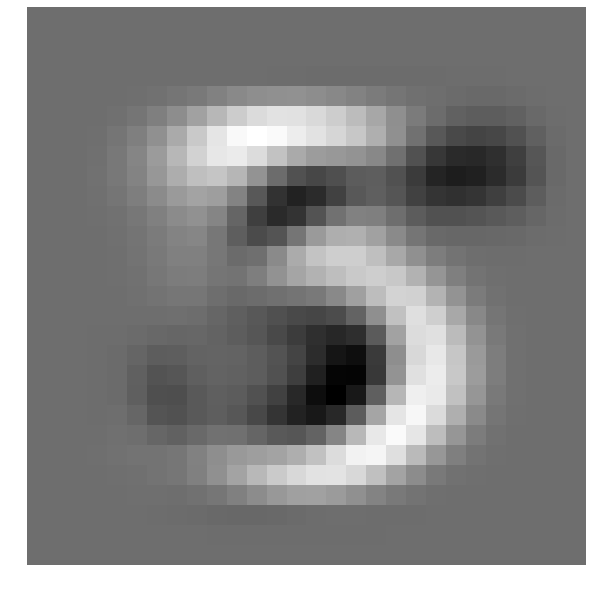

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(pca_3_5.components_[0].reshape((28, 28)).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

And then some more (there are at least 784 of them)

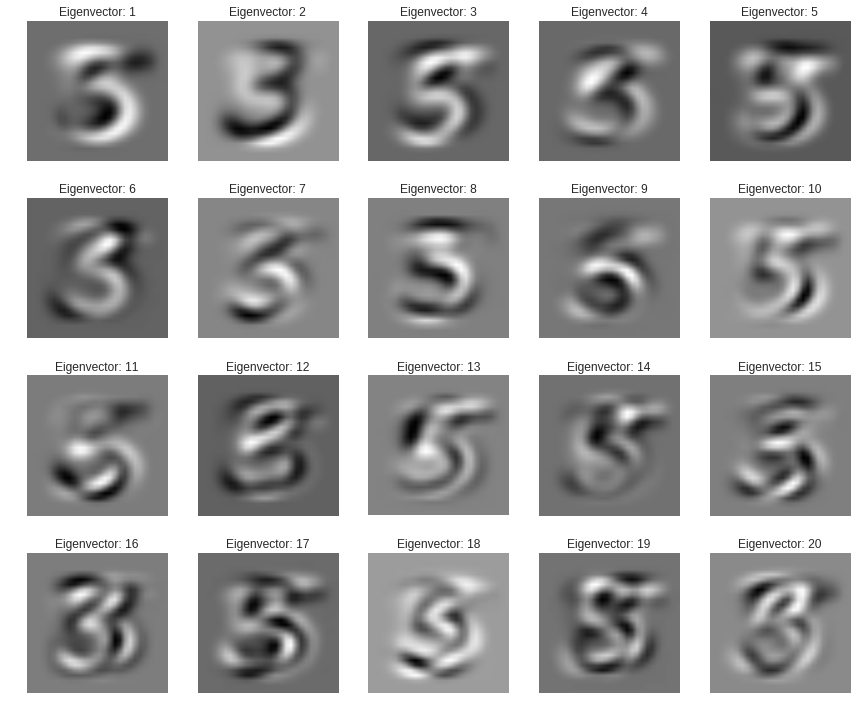

In [38]:
plt.figure(figsize=(12,10))
for i in range(20):
    example = pca_3_5.components_[i].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()

Now lets take a step back and run PCA on say just the 0 labels

In [39]:
pca_0 = PCA(n_components=X_0_1.shape[1])
X_0_pca = pca_0.fit_transform(X_0_1[y_0_1==0])
print('X_std_pca.shape:', X_0_pca.shape)
print('pca.components_:', pca_0.components_.shape)

('X_std_pca.shape:', (5923, 784))
('pca.components_:', (784, 784))


Take a look at the first sample. Here we'll project it then reconstruct it using all of our 784 components. Looks pretty good right? Can you tell the difference, what direction is which; left-to-right or right-to-left?

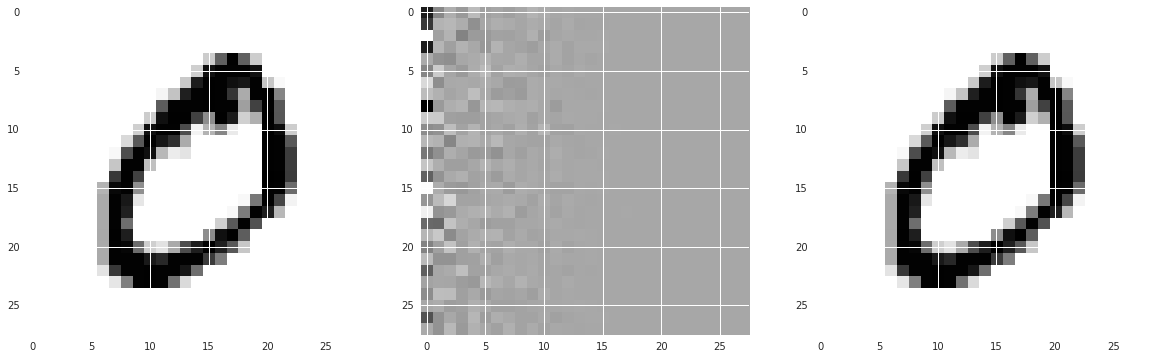

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,15))
ax1.imshow(X_0_1.ix[0].reshape((28, 28)).T, cmap='gray_r', interpolation='nearest')
projection = pca_0.transform(X_0_1.ix[0].reshape(1, -1))
ax2.imshow(projection.reshape((28, 28)).T, cmap='gray_r', interpolation='nearest')
reconstruction = pca_0.inverse_transform(projection)
ax3.imshow(reconstruction.reshape((28, 28)).T, cmap='gray_r', interpolation='nearest'); plt.show()

Now lets do something a little more advanced, let take a look how the reconstruction evolves as we gradually use more and more of the most dominate principal components. All we need is small for loop, access to sklearn's `components_` attributes, and some knowledge of how PCA works.

In [41]:
reconstructions = []
n = 20
for i in range(1,n+1):
    projection = X_0_1.ix[0].dot(pca_0.components_[:i].T)
    reconstruction = projection.dot(pca_0.components_[:i])
    reconstructions.append(reconstruction)

Now we can quickly see the effect of how few components are necessary for an accurate reconstruction

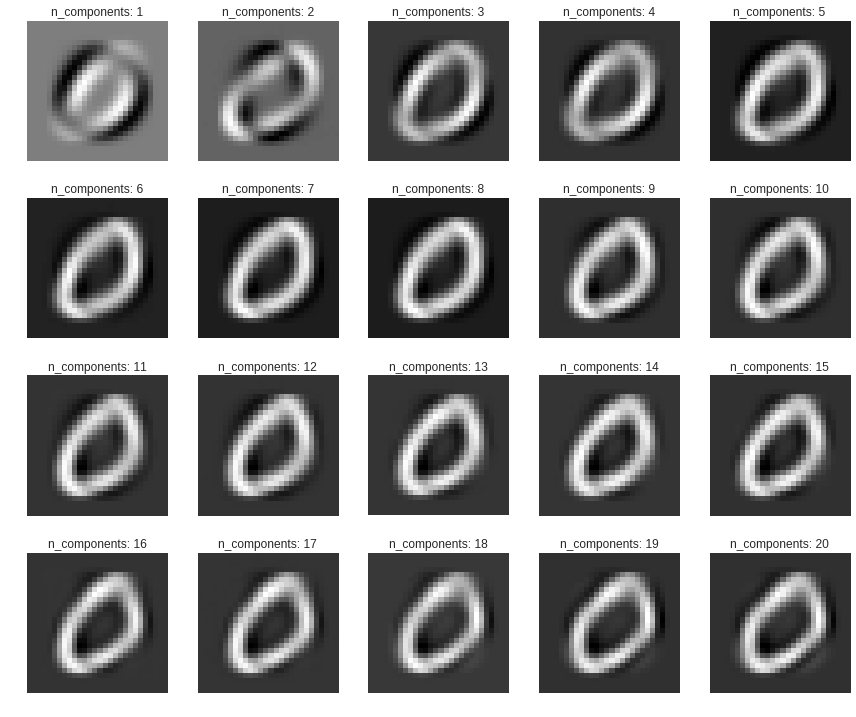

In [42]:
plt.figure(figsize=(12,10))
for i in range(n):
    example = reconstructions[i].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray', interpolation='nearest')
    plt.title("n_components: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()

# Naive Bayes
## [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

> * "Simple probabilistic classifier based on Bayes' theorem with naive independence assumptions between the features."
* Highly scalable family of algorithms based on the aforementioned principle.
* "For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness and diameter features." 


In [128]:
from sklearn.cross_validation import train_test_split
import math
import numpy as np

label_dict = {1: 'Class 1', 2: 'Class 2', 3:'Class 3'}
np.set_printoptions(precision=4)
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.5, random_state=39)

In [147]:
mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X_train[y_train==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

variance = np.var(X_train, axis=0)
print('Variance Vector: %s\n' %(variance))

Mean Vector class 1: [  1.3857e+01   1.9666e+00   2.4755e+00   1.7159e+01   1.0834e+02
   2.9138e+00   3.0683e+00   2.9690e-01   1.8572e+00   5.6841e+00
   1.0679e+00   3.1424e+00   1.1333e+03]

Mean Vector class 2: [  1.2331e+01   1.9064e+00   2.2787e+00   2.0890e+01   9.4897e+01
   2.2992e+00   2.1895e+00   3.4103e-01   1.5490e+00   3.2146e+00
   1.0745e+00   2.9018e+00   5.3174e+02]

Variance Vector: [  7.6512e-01   1.4096e+00   8.5455e-02   1.3067e+01   2.1860e+02
   4.0506e-01   1.0086e+00   1.5448e-02   2.3680e-01   5.4417e+00
   5.6066e-02   4.7298e-01   1.0207e+05]



In [148]:
w0 = math.log(1)
w1_vectors = []
for i in range(0,len(mean_vectors[0])):
    w0 = w0 + (mean_vectors[0][i] * mean_vectors[0][i] - mean_vectors[1][i] * mean_vectors[1][i]) / (2*variance[i])
    w1_vectors.append((mean_vectors[0][i] - mean_vectors[1][i]) / variance[i])
print w0
print w1_vectors

48.3837306665
[1.9947278845778555, 0.04266542899670836, 2.3029604247474862, -0.28554811789915663, 0.061517060102082022, 1.5172308040950151, 0.87133085607213501, -2.8566917484648391, 1.3017878878621443, 0.45381528197591209, -0.1173937952517846, 0.50873333472627502, 0.0058933270003589684]


In [133]:
from sklearn.naive_bayes import GaussianNB
def myNaiveBayes(input,id):
    gnb = GaussianNB()
    return gnb.fit(input,id)

In [144]:
from sklearn.metrics import confusion_matrix
import pylab as pl
y_pred = myNaiveBayes(X_train[y_train!=3],y_train[y_train!=3]).predict(X_test[y_test!=3])
accuracy = confusion_matrix(y_test[y_test!=3],y_pred)
print(accuracy)

[[28  2]
 [ 0 32]]


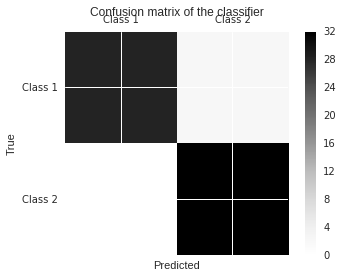

In [145]:
labels = ['Class 1', 'Class 2']
fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(accuracy)
pl.title('Confusion matrix of the classifier')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

Now let's try with all the classes as a test

In [150]:
y_pred = myNaiveBayes(X_train,y_train).predict(X_test)
accuracy = confusion_matrix(y_test,y_pred)
print(accuracy)

[[28  2  0]
 [ 0 31  1]
 [ 0  0 27]]


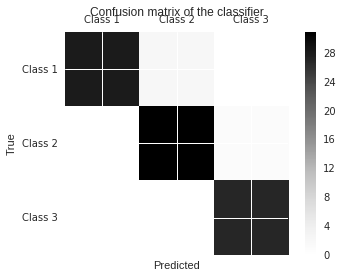

In [154]:
labels = ['Class 1', 'Class 2', 'Class 3']
fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(accuracy)
pl.title('Confusion matrix of the classifier')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

Now we can do the same with MNIST

In [155]:
label_dict = {1: '0', 2: '1', 3:'3', 4:'5'}
X_train, X_test, y_train, y_test = train_test_split(X_0_1.as_matrix(), y_0_1.as_matrix(), test_size=0.5, random_state=39)

In [156]:
mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X_train[y_train==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

variance = np.var(X_train, axis=0)
print('Variance Vector: %s\n' %(variance))

Mean Vector class 1: [  0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   3.6909e-05   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   3.4603e-06   1.7301e-05
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   8.0738e-06
   1.2226e-04   2.7682e-05   9.4579e-05   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   4.8444e-05
   1.6609e-04   2.3068e-05   0.0000e+00   8.3044e-05   1.9608e-05
   0.0000e+00   0.0000e+00   5.7671e-06   1.4994e-05   8.0738e-06
   0.0000e+00   0.0000e+00   3.4603e-06   5.0750e-05   

That's a mess. Lots of data, luckily we can ignore all the zeros

In [157]:
y_pred = myNaiveBayes(X_train,y_train).predict(X_test)
accuracy = confusion_matrix(y_test,y_pred)
print(accuracy)

[[2971   20]
 [  85 3257]]


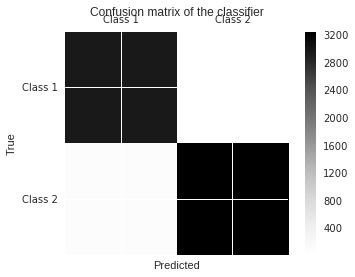

In [158]:
labels = ['Class 1', 'Class 2', 'Class 3']
fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(accuracy)
pl.title('Confusion matrix of the classifier')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_3_5.as_matrix(), y_3_5.as_matrix(), test_size=0.5, random_state=39)

In [161]:
y_pred = myNaiveBayes(X_train,y_train).predict(X_test)
accuracy = confusion_matrix(y_test,y_pred)
print(accuracy)

[[2991   68]
 [1110 1607]]


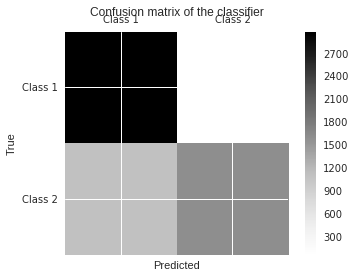

In [162]:
labels = ['Class 1', 'Class 2', 'Class 3']
fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(accuracy)
pl.title('Confusion matrix of the classifier')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()